In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.preprocessing import MinMaxScaler

In [32]:
#load the data 
xrt_df = pd.read_csv('XRT.csv')

In [33]:
xrt_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-03,43.689999,43.955002,43.645000,43.799999,38.968216,4769600
1,2014-01-06,43.750000,43.924999,43.334999,43.380001,38.594555,5658200
2,2014-01-07,43.535000,43.705002,43.259998,43.450001,38.656826,7025200
3,2014-01-08,43.404999,43.450001,43.084999,43.244999,38.474434,5277200
4,2014-01-09,43.340000,43.340000,42.654999,42.904999,38.171951,7345000


In [34]:
#Inspect it 
print(xrt_df)

            Date       Open       High        Low      Close  Adj Close  \
0     2014-01-03  43.689999  43.955002  43.645000  43.799999  38.968216   
1     2014-01-06  43.750000  43.924999  43.334999  43.380001  38.594555   
2     2014-01-07  43.535000  43.705002  43.259998  43.450001  38.656826   
3     2014-01-08  43.404999  43.450001  43.084999  43.244999  38.474434   
4     2014-01-09  43.340000  43.340000  42.654999  42.904999  38.171951   
...          ...        ...        ...        ...        ...        ...   
2169  2022-08-16  71.849998  75.790001  71.529999  74.349998  74.349998   
2170  2022-08-17  73.150002  73.489998  71.720001  72.230003  72.230003   
2171  2022-08-18  71.989998  72.070000  70.949997  71.720001  71.720001   
2172  2022-08-19  70.800003  71.139999  69.029999  69.419998  69.419998   
2173  2022-08-22  68.180000  68.300003  67.059998  67.230003  67.230003   

       Volume  
0     4769600  
1     5658200  
2     7025200  
3     5277200  
4     7345000  
...

In [35]:
#print the summary 
print(xrt_df.describe())

              Open         High          Low        Close    Adj Close  \
count  2174.000000  2174.000000  2174.000000  2174.000000  2174.000000   
mean     52.057183    52.558774    51.513429    52.043335    49.224037   
std      16.643219    16.887788    16.349743    16.613608    17.285598   
min      27.549999    27.770000    26.290001    26.990000    26.168465   
25%      42.601248    42.952500    42.271251    42.650002    39.146802   
50%      45.135000    45.500000    44.790001    45.182501    41.999617   
75%      50.655000    50.987501    50.343749    50.667499    48.016634   
max     104.160004   104.309998   102.410004   104.160004   102.392715   

             Volume  
count  2.174000e+03  
mean   4.859034e+06  
std    2.598077e+06  
min    5.547000e+05  
25%    3.055200e+06  
50%    4.336900e+06  
75%    6.045500e+06  
max    3.274590e+07  


In [36]:
#now prep the data for 2014-2019
xrt_df.set_index(pd.DatetimeIndex(xrt_df['Date']), inplace=True)

In [37]:
#Keep the close for 2014-19
xrt_df = xrt_df[['Close']]

In [38]:
print(xrt_df)

                Close
Date                 
2014-01-03  43.799999
2014-01-06  43.380001
2014-01-07  43.450001
2014-01-08  43.244999
2014-01-09  42.904999
...               ...
2022-08-16  74.349998
2022-08-17  72.230003
2022-08-18  71.720001
2022-08-19  69.419998
2022-08-22  67.230003

[2174 rows x 1 columns]


In [39]:
print (xrt_df.index.max())

2022-08-22 00:00:00


In [40]:

data = xrt_df.filter(['Close'])
dataset = data.values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

training_data_len =math.ceil(len(dataset) *.7)
train_data =scaled_data[0:training_data_len , : ]


X_train_data = []
y_train_data = []

for i in range(1500,len(train_data)):
    X_train_data=list(X_train_data)
    y_train_data=list(y_train_data)
    X_train_data.append(train_data[i-1500:i,0])
    y_train_data.append(train_data[i,0])
    
    X_train_data1, y_train_data1 = np.array(X_train_data), np.array(y_train_data)
    
    X_train_data2 = np.reshape(X_train_data1,(X_train_data1.shape[0],X_train_data1.shape[1],1))

   
    
#1500 = number of days you can change it accordingly. 

# There will be a total of 60 values, 1st column will contain an index of 0-59
# The second will have an index of 1-60 ++_
# the y_train has the 60 st value on c1 and c2 will have 61++

In [41]:
#Lets build the LSTM MODEL 

model = Sequential()

model.add(LSTM(units=50, return_sequences=True,input_shape=(X_train_data2.shape[1],1)))

model.add(LSTM(units=50, return_sequences=False))

model.add(Dense(units=25))

model.add(Dense(units=1))


#okay this example will have 2 LSTM layers w/50 neurons and 2 dense layers
# plust one with 25 nuerons 

In [42]:
# Comple the model 

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_data2, y_train_data1, batch_size=1, epochs=1)

22/22 [==============================] - 12s 440ms/step - loss: 0.0063


In [43]:
test_data = scaled_data[training_data_len -1500: , : ]

X_test = []

y_test = dataset[training_data_len : , : ]

for i in range(1500,len(test_data)):
    
    X_test.append(test_data[i-1500:i,0])

X_test = np.array(X_test)

X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

predictions = model.predict(X_test)

predictions = scaler.inverse_transform(predictions)


21/21 [==============================] - 5s 215ms/step


In [44]:
# Error calculation where RMSE = root mean squared error 

rmse=np.sqrt(np.mean(((predictions-y_test)**2)))

In [45]:
print(rmse)

15.046580567385252


In [46]:
y_test.dtype

dtype('float64')

In [47]:
predictions.dtype

dtype('float32')

In [48]:
#OOOF okay the lower the value is to 0 the better
# it indicates that the models p-value match the actual values from the data set 
# which in this case it does not. 

/Users/dashickscott/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


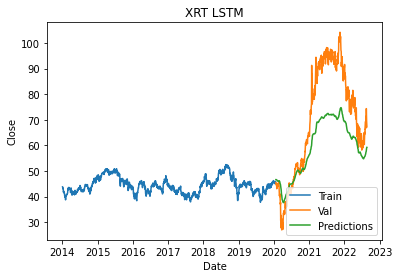

In [50]:
#Predict and visualize 

train = xrt_df[:training_data_len]

valid = xrt_df[training_data_len:]

valid['Predictions'] = predictions

plt.title('XRT LSTM')

plt.xlabel('Date')

plt.ylabel('Close')

plt.plot(train['Close'])

plt.plot(valid[['Close', 'Predictions']])

plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

plt.show()


<AxesSubplot:xlabel='Date'>

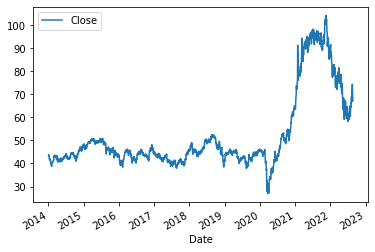

In [51]:
xrt_df.plot()

In [52]:
train['Close']

Date
2014-01-03    43.799999
2014-01-06    43.380001
2014-01-07    43.450001
2014-01-08    43.244999
2014-01-09    42.904999
                ...    
2020-01-14    45.610001
2020-01-15    45.340000
2020-01-16    45.930000
2020-01-17    45.880001
2020-01-21    45.639999
Name: Close, Length: 1522, dtype: float64

In [53]:
valid[['Close', 'Predictions']]

,Close,Predictions
Date,,
2020-01-22,45.470001,46.627213
2020-01-23,45.419998,46.633110
2020-01-24,44.900002,46.635014
2020-01-27,44.470001,46.623531
2020-01-28,44.720001,46.594402
...,...,...
2022-08-16,74.349998,57.972523
2022-08-17,72.230003,58.337128
2022-08-18,71.720001,58.682907


In [54]:
complete_df = pd.concat([train[['Close']], valid[['Close', 'Predictions']]])
complete_df

,Close,Predictions
Date,,
2014-01-03,43.799999,NaN
2014-01-06,43.380001,NaN
2014-01-07,43.450001,NaN
2014-01-08,43.244999,NaN
2014-01-09,42.904999,NaN
...,...,...
2022-08-16,74.349998,57.972523
2022-08-17,72.230003,58.337128
2022-08-18,71.720001,58.682907


In [55]:
#Stop

In [56]:
complete_df.head()

,Close,Predictions
Date,,
2014-01-03,43.799999,NaN
2014-01-06,43.380001,NaN
2014-01-07,43.450001,NaN
2014-01-08,43.244999,NaN
2014-01-09,42.904999,NaN


In [57]:
complete_df2 = complete_df.dropna()

print(complete_df2)

                Close  Predictions
Date                              
2020-01-22  45.470001    46.627213
2020-01-23  45.419998    46.633110
2020-01-24  44.900002    46.635014
2020-01-27  44.470001    46.623531
2020-01-28  44.720001    46.594402
...               ...          ...
2022-08-16  74.349998    57.972523
2022-08-17  72.230003    58.337128
2022-08-18  71.720001    58.682907
2022-08-19  69.419998    58.992912
2022-08-22  67.230003    59.222313

[652 rows x 2 columns]


In [58]:
complete_df2['Difference'] = complete_df2['Close'] - complete_df2['Predictions'] 

/Users/dashickscott/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
complete_df2.loc[~(complete_df2==0).all(axis=1)]

,Close,Predictions,Difference
Date,,,
2020-01-22,45.470001,46.627213,-1.157212
2020-01-23,45.419998,46.633110,-1.213112
2020-01-24,44.900002,46.635014,-1.735012
2020-01-27,44.470001,46.623531,-2.153530
2020-01-28,44.720001,46.594402,-1.874401
...,...,...,...
2022-08-16,74.349998,57.972523,16.377475
2022-08-17,72.230003,58.337128,13.892875
2022-08-18,71.720001,58.682907,13.037094


In [27]:
# complete_df2.to_csv('AP_WMT.csv', index=False)

In [60]:
complete_df2.to_csv('AP_XRT.csv', index=False)